In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/gabri/Desktop/FATEC/6/data-engineering-challenge')
from config.dbconnection import mysql

In [7]:
cursor = mysql.cursor()

In [8]:
cursor.execute('''SELECT P.ProductID, SOD.OrderQty, SOH.OrderDate, SOH.Status, SOH.TotalDue, SOD.UnitPrice
                FROM product P
                INNER JOIN salesorderdetail SOD ON SOD.ProductID = P.ProductID
                INNER JOIN salesorderheader SOH ON SOD.SalesOrderID = SOH.SalesOrderID;''')

In [9]:
data = cursor.fetchall()

In [112]:
df = pd.DataFrame(data, columns = ['product_id', 'order_qty', 'order_date', 'status', 'total_due', 'unit_price'])
df['order_date'] = pd.to_datetime(df['order_date'])

In [97]:
df.head()

,product_id,order_qty,order_date,status,total_due,unit_price
0,707,1,2011-05-31,5,"16158,6961","20,1865"
1,707,2,2011-05-31,5,"40487,7233","20,1865"
2,707,4,2011-05-31,5,"4216,0258","20,1865"
3,707,1,2011-05-31,5,"8773,681","20,1865"
4,707,1,2011-05-31,5,"11036,3964","20,1865"


In [98]:
product = df.groupby(['product_id'])

In [99]:
top_10_qtd = product.sum()['order_qty'].sort_values(ascending = False).head(10)

In [100]:
top_10_qtd.index

Index(['712', '870', '711', '715', '708', '707', '864', '873', '884', '714'], dtype='object', name='product_id')

[Text(0, 0, '712'),
 Text(1, 0, '870'),
 Text(2, 0, '711'),
 Text(3, 0, '715'),
 Text(4, 0, '708'),
 Text(5, 0, '707'),
 Text(6, 0, '864'),
 Text(7, 0, '873'),
 Text(8, 0, '884'),
 Text(9, 0, '714')]

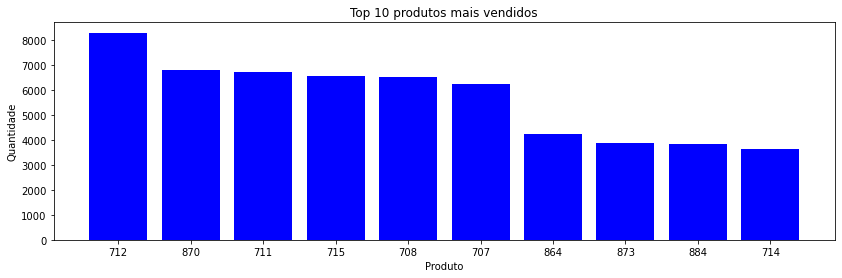

In [101]:
labels = top_10_qtd.index
itens = top_10_qtd.values
x = np.arange(len(labels))  
fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(x, itens, color='b')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Produto')
ax.set_title('Top 10 produtos mais vendidos')
ax.set_xticks(x)
ax.set_xticklabels(labels)

In [106]:
order_date = df.groupby(['order_date'])
by_date = order_date.sum()['order_qty']

Text(0.5, 0, 'Data')

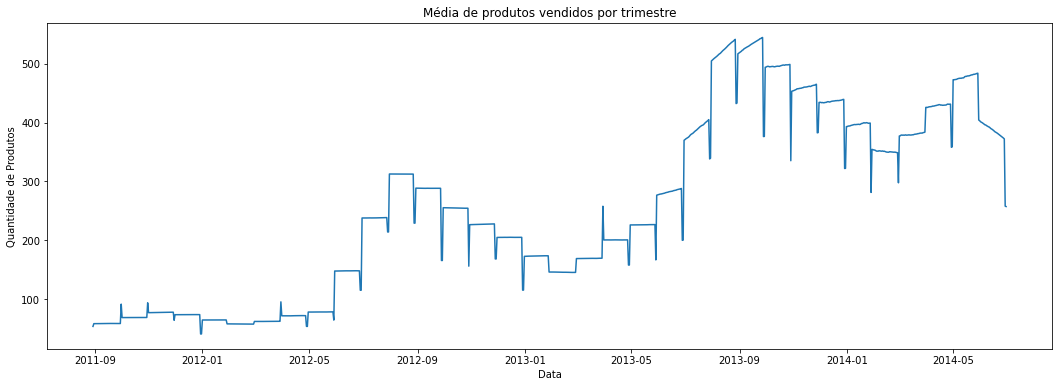

In [107]:
start, end = '2020-01', '2020-12'
rolmean = by_date.rolling(window = 90).mean() #Trimestre
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(rolmean)
ax.set_title('Média de produtos vendidos por trimestre')
ax.set_ylabel('Quantidade de Produtos')
ax.set_xlabel('Data')

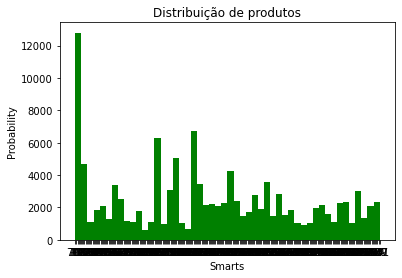

In [133]:
plt.hist(df['product_id'], 50, facecolor='g')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Distribuição de produtos')
plt.show()